<Figure size 5760x3600 with 0 Axes>

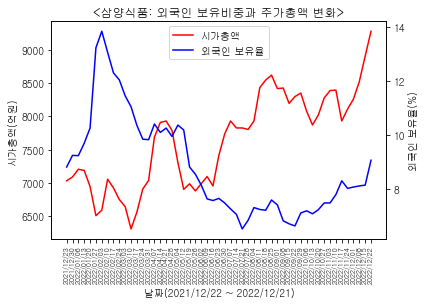

외국인 보유율과 시가총액 상관계수 :  -0.6610797193571432


In [59]:
from matplotlib import pyplot as plt 
from urllib.request import urlopen 
from urllib.error import URLError, HTTPError 
import numpy as np 
import pandas as pd
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import urllib.request 
import time 
import requests 
import json 
import matplotlib 
from matplotlib import font_manager, rc 
import matplotlib.ticker as ticker
import seaborn as sns

#크롤링
url = "http://comp.fnguide.com/SVO2/json/chart/01_01/chart_a003230_1y.json?_=1671630976299" 
response = requests.get(url) 
response.encoding = 'utf-8-sig' 
recode=response.json() 

#필요한 데이터 뽑아내기
recodeA = recode.get("CHART") 
date=[] 
value=[] 
fore=[]

#외국인 보유율(string형 ->float형) , 시가총액(string형 ->int형)
for i in range(len(recodeA)): 
    
    date.append(recodeA[i]["TRD_DT"]) 
    recodeA[i]["MKT_CAP"]=int(recodeA[i]["MKT_CAP"])
    value.append(recodeA[i]["MKT_CAP"]) 
    recodeA[i]["FRG_RT"]=float(recodeA[i]["FRG_RT"])
    fore.append(recodeA[i]["FRG_RT"])

SAMYANG=pd.DataFrame({"date":date, "stockPrice":value, "frg_RT":fore}) 

day = list() 
stockPrice = list() 
frg = list() 
for i in range(len(recodeA)):
    day.append(SAMYANG['date'][i]) 
    stockPrice.append(SAMYANG['stockPrice'][i]) 
    frg.append(SAMYANG['frg_RT'][i])
#그래프에 한글 표기
font_path = "C:/Windows/Fonts/NGULIM.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name() 
rc('font', family=font)

plt.figure(figsize=(80, 50)) 
fig, ax1 = plt.subplots() 
plt.xticks(rotation=90) 
line1=ax1.plot(date, stockPrice, color = "red",label = "시가총액")
ax1.yaxis.set_major_locator(ticker.MultipleLocator(500)) 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10)) #ax1.tick_params(axis = 'stockPrice', labelcolor = "red")

ax2 = ax1.twinx() 
line2=ax2.plot(date, frg, color = "blue",label = "외국인 보유율") 
lines = line1 + line2 
labels = [l.get_label() for l in lines] 
ax1.legend(lines, labels, loc='upper center') 
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2)) #ax2.tick_params(axis = 'frg',labelcolor = "blue")

plt.rc('xtick', labelsize=7) 
plt.title("<삼양식품: 외국인 보유비중과 주가총액 변화>") 
ax1.set_xlabel("날짜(2021/12/22 ~ 2022/12/21)") 
ax1.set_ylabel("시가총액(억원)") 
ax2.set_ylabel("외국인 보유율(%)")

plt.show()

##외국인 보유율과 시가총액 상관계수 구하기

frgCorr = SAMYANG["stockPrice"].corr(SAMYANG["frg_RT"])
print("외국인 보유율과 시가총액 상관계수 : ",frgCorr)

기관 순매수량과 시가총액 상관계수 :  -0.157427267911018


<Figure size 5760x3600 with 0 Axes>

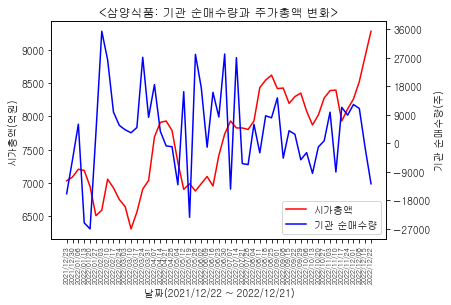

In [63]:
from matplotlib import pyplot as plt 
from urllib.request import urlopen 
from urllib.error import URLError, HTTPError 
import numpy as np 
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import urllib.request 
import time 
from datetime import datetime
import requests 
import json 
import matplotlib 
from matplotlib import font_manager, rc 
import matplotlib.ticker as ticker
import datetime
import seaborn as sns

##json 파일 받기
with open('asdf.json', 'r') as f:

    json_data = json.load(f)
    institutionData=json.dumps(json_data)

json_object = json.loads(institutionData)
json_object

##문자열에서 날짜로 타입 변경(후에 날짜 계산 위해)
institution=list()
j=0
for i in range(len(json_object)): 
    datetime_string= json_object[i]["date"]
    datetime_format = "%Y-%m-%d %H:%M:%S"
    datetime_result = datetime.datetime.strptime(datetime_string, datetime_format)
    Day = day[j]
    Day = datetime.datetime.strptime(Day, "%Y/%m/%d")

    if(Day==datetime_result):
        json_object[i]["institutionStraightPurchaseVolume"]=int(json_object[i]["institutionStraightPurchaseVolume"])
        institution.append(json_object[i]["institutionStraightPurchaseVolume"])
        j=j+1
        if(j==len(day)):
            break;
    
    

plt.figure(figsize=(80, 50)) 
fig, ax1 = plt.subplots() 
plt.xticks(rotation=90) 
line1=ax1.plot(date, stockPrice, color = "red",label = "시가총액")


ax1.xaxis.set_major_locator(ticker.MultipleLocator(10)) #ax1.tick_params(axis = 'stockPrice', labelcolor = "red")

ax2 = ax1.twinx() 
line2=ax2.plot(date, institution, color = "blue",label = "기관 순매수량") 
lines = line1 + line2 
labels = [l.get_label() for l in lines] 
ax1.legend(lines, labels, loc='lower right') 
## exceeds Locator.MAXTICKS (1000) 오류해결
ax2.yaxis.set_major_locator(ticker.MultipleLocator(9000)) 



    
plt.rc('xtick', labelsize=7) 
plt.title("<삼양식품: 기관 순매수량과 주가총액 변화>") 
ax1.set_xlabel("날짜(2021/12/22 ~ 2022/12/21)") 
ax1.set_ylabel("시가총액(억원)") 
ax2.set_ylabel("기관 순매수량(주)")




#한 데이터 프레임으로 합치기
addDf = pd.DataFrame({"institution": institution})
SAMYANG = pd.concat([SAMYANG,addDf], axis = 1)

##기관 순매수량과 시가총액 상관계수 구하기
corr_institution = SAMYANG["stockPrice"].corr(SAMYANG["institution"])
print("기관 순매수량과 시가총액 상관계수 : ",corr_institution)


<Figure size 5760x3600 with 0 Axes>

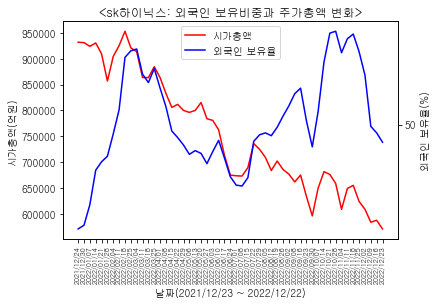

sk하이닉스 외국인 보유율과 시가총액 상관계수 :  -0.20133746083938078


In [8]:
from matplotlib import pyplot as plt 
from urllib.request import urlopen 
from urllib.error import URLError, HTTPError 
import numpy as np 
import pandas as pd
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import urllib.request 
import time 
import requests 
import json 
import matplotlib 
from matplotlib import font_manager, rc 
import matplotlib.ticker as ticker
import seaborn as sns

url = "http://comp.fnguide.com/SVO2/json/chart/01_01/chart_a000660_1y.json?_=167177040622" 
response = requests.get(url) 
response.encoding = 'utf-8-sig' 
recode=response.json() 
recodeA = recode.get("CHART") 
date=[] 
value=[] 
fore=[]
#외국인 보유율(string형 ->float형) , 시가총액(string형 ->int형)
for i in range(len(recodeA)): 
    
    date.append(recodeA[i]["TRD_DT"]) 
    recodeA[i]["MKT_CAP"]=int(recodeA[i]["MKT_CAP"])
    value.append(recodeA[i]["MKT_CAP"]) 
    recodeA[i]["FRG_RT"]=float(recodeA[i]["FRG_RT"])
    fore.append(recodeA[i]["FRG_RT"])

SKhynix=pd.DataFrame({"date":date, "stockPrice":value, "frg_RT":fore}) 

day = list() 
stockPrice = list() 
frg = list() 
for i in range(len(recodeA)):
    day.append(SKhynix['date'][i]) 
    stockPrice.append(SKhynix['stockPrice'][i]) 
    frg.append(SKhynix['frg_RT'][i])
#그래프에 한글 표기
font_path = "C:/Windows/Fonts/NGULIM.TTF" 
font = font_manager.FontProperties(fname=font_path).get_name() 
rc('font', family=font)

plt.figure(figsize=(80, 50)) 
fig, ax1 = plt.subplots() 
plt.xticks(rotation=90) 
line1=ax1.plot(date, stockPrice, color = "red",label = "시가총액")
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50000)) 
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10)) #ax1.tick_params(axis = 'stockPrice', labelcolor = "red")

ax2 = ax1.twinx() 
line2=ax2.plot(date, frg, color = "blue",label = "외국인 보유율") 
lines = line1 + line2 
labels = [l.get_label() for l in lines] 
ax1.legend(lines, labels, loc='upper center') 
ax2.yaxis.set_major_locator(ticker.MultipleLocator(2)) #ax2.tick_params(axis = 'frg',labelcolor = "blue")

plt.rc('xtick', labelsize=7) 
plt.title("<sk하이닉스: 외국인 보유비중과 주가총액 변화>") 
ax1.set_xlabel("날짜(2021/12/23 ~ 2022/12/22)") 
ax1.set_ylabel("시가총액(억원)") 
ax2.set_ylabel("외국인 보유율(%)")

plt.show()

##외국인 보유율과 시가총액 상관계수 구하기

frgCorr = SKhynix['stockPrice'].corr(SKhynix['frg_RT'])
print("sk하이닉스 외국인 보유율과 시가총액 상관계수 : ",frgCorr)

기관 순매수량과 sk시가총액 상관계수 :  0.0263119349610264


<Figure size 5760x3600 with 0 Axes>

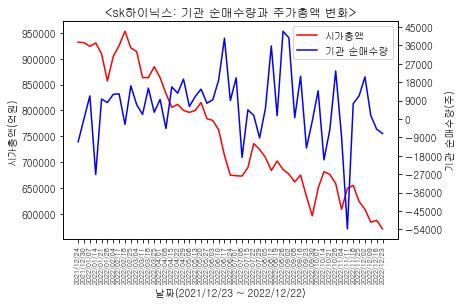

In [3]:

for i in range(len(recodeA)):from matplotlib import pyplot as plt 
from urllib.request import urlopen 
from urllib.error import URLError, HTTPError 
import numpy as np 
from urllib.request import urlopen 
from bs4 import BeautifulSoup 
import urllib.request 
import time 
from datetime import datetime
import requests 
import json 
import matplotlib 
from matplotlib import font_manager, rc 
import matplotlib.ticker as ticker
import datetime
import seaborn as sns

##json 파일 받기
with open('skhynix.json', 'r') as f:

    json_data = json.load(f)
    institutionData=json.dumps(json_data)

json_object = json.loads(institutionData)


##문자열에서 날짜로 타입 변경(후에 날짜 계산 위해)
institution=list()

for i in range(len(json_object)): 
    datetime_string= json_object[i]["date"]
    datetime_format = "%Y-%m-%d %H:%M:%S"
    datetime_result = datetime.datetime.strptime(datetime_string, datetime_format)
   
   
    for j in range(len(day)):
        Day = day[j]
        Day = datetime.datetime.strptime(Day, "%Y/%m/%d")
        if(Day==datetime_result):
            json_object[i]["institutionStraightPurchaseVolume"]=int(json_object[i]["institutionStraightPurchaseVolume"])
            institution.append(json_object[i]["institutionStraightPurchaseVolume"])
  

    
        
plt.figure(figsize=(80, 50)) 
fig, ax1 = plt.subplots() 
plt.xticks(rotation=90) 
line1=ax1.plot(date, stockPrice, color = "red",label = "시가총액")


ax1.xaxis.set_major_locator(ticker.MultipleLocator(10)) #ax1.tick_params(axis = 'stockPrice', labelcolor = "red")

ax2 = ax1.twinx() 
line2=ax2.plot(date, institution, color = "blue",label = "기관 순매수량") 
lines = line1 + line2 
labels = [l.get_label() for l in lines] 
ax1.legend(lines, labels, loc='best') 
## exceeds Locator.MAXTICKS (1000) 오류해결
ax2.yaxis.set_major_locator(ticker.MultipleLocator(9000)) 



    
plt.rc('xtick', labelsize=7) 
plt.title("<sk하이닉스: 기관 순매수량과 주가총액 변화>") 
ax1.set_xlabel("날짜(2021/12/23 ~ 2022/12/22)") 
ax1.set_ylabel("시가총액(억원)") 
ax2.set_ylabel("기관 순매수량(주)")




#한 데이터 프레임으로 합치기
addDf = pd.DataFrame({"Institution": institution})
hynix = pd.concat([SKhynix,addDf], axis = 1)
##기관 순매수량과 시가총액 상관계수 구하기
corr_institution = hynix["stockPrice"].corr(hynix["Institution"])
print("기관 순매수량과 sk시가총액 상관계수 : ",corr_institution)




        
    
    

